In [1]:
%matplotlib inline

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt

import json
import git
from collections import defaultdict
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
path = Path(".")
if not path.joinpath("cf-action-counter-db").is_dir():
    !git clone https://github.com/regro/cf-action-counter-db

Cloning into 'cf-action-counter-db'...
remote: Enumerating objects: 98790, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 98790 (delta 120), reused 183 (delta 60), pack-reused 98546
Receiving objects: 100% (98790/98790), 22.39 MiB | 44.34 MiB/s, done.
Resolving deltas: 100% (49468/49468), done.


In [5]:
keys = ['appveyor', 'azure-pipelines', 'circleci', 'drone', 'github-actions', 'travis-ci']

In [6]:
totals = defaultdict(dict)

In [7]:
repo = git.Repo('cf-action-counter-db')
ggit = repo.git
for commit in tqdm(repo.iter_commits(rev='master')):
    ggit.checkout(commit)
    if os.path.exists('cf-action-counter-db/data/latest.json'):
        with open('cf-action-counter-db/data/latest.json', 'r') as f:
            data = json.load(f)
        for k in keys:
            if k in data and 'rates' in data[k]:
                totals[k].update(data[k]['rates'])

24702it [25:54, 15.89it/s]


In [7]:
len(totals['azure-pipelines'])

106676

In [8]:
df = pd.DataFrame(totals)
df.index = pd.to_datetime(df.index)

In [9]:
df.head()

,appveyor,azure-pipelines,circleci,drone,github-actions,travis-ci
2021-03-16 11:05:00-04:00,0.0,14,0.0,0.0,15,1
2021-03-16 11:10:00-04:00,0.0,45,0.0,0.0,26,4
2021-03-16 11:15:00-04:00,0.0,3,0.0,0.0,14,0
2021-03-16 11:20:00-04:00,0.0,10,0.0,1.0,17,1
2021-03-16 11:25:00-04:00,0.0,29,0.0,0.0,11,0


In [10]:
df.index = pd.to_datetime(df.index, utc=True)

In [11]:
df.index = pd.DatetimeIndex(df.index)

In [12]:
df3 = df.resample('D').sum()

In [13]:
df3.head()

,appveyor,azure-pipelines,circleci,drone,github-actions,travis-ci
2020-01-29 00:00:00+00:00,0.0,55,0.0,0.0,0,1
2020-01-30 00:00:00+00:00,0.0,1847,0.0,0.0,90,83
2020-01-31 00:00:00+00:00,0.0,1902,0.0,0.0,5,48
2020-02-01 00:00:00+00:00,0.0,722,0.0,0.0,17,55
2020-02-02 00:00:00+00:00,0.0,708,0.0,0.0,2,37


In [14]:
df3.sum()

appveyor             2750.0
azure-pipelines    760241.0
circleci            12544.0
drone               15273.0
github-actions     385851.0
travis-ci           20364.0
dtype: float64

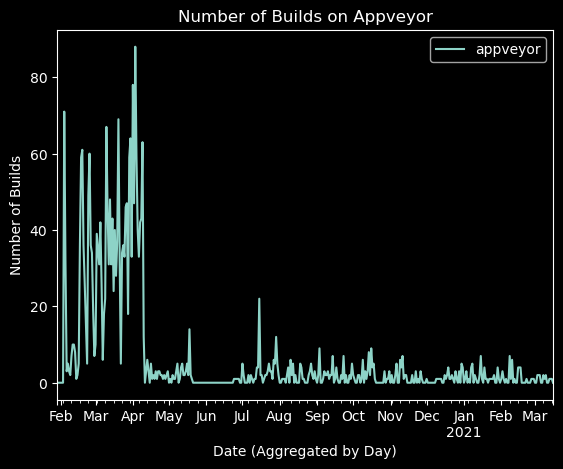

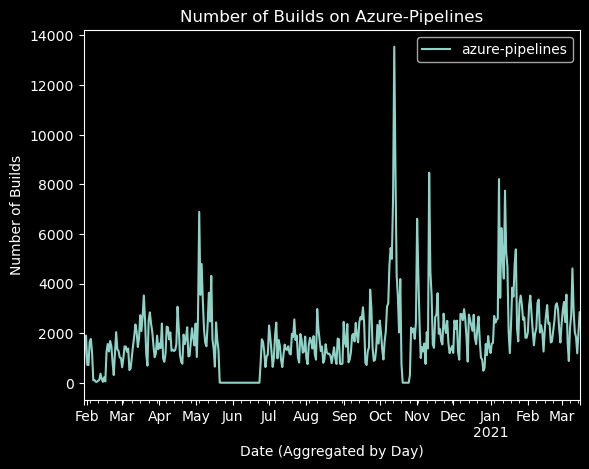

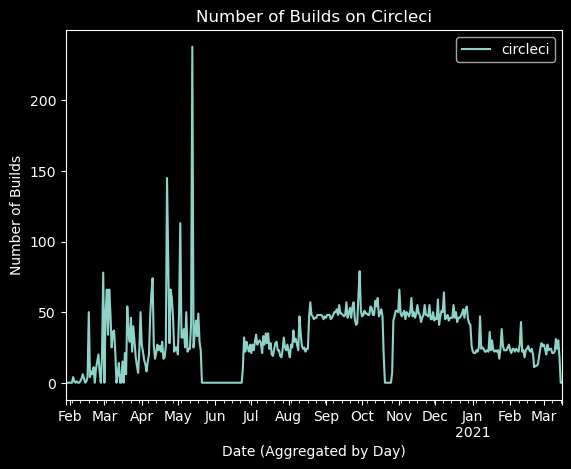

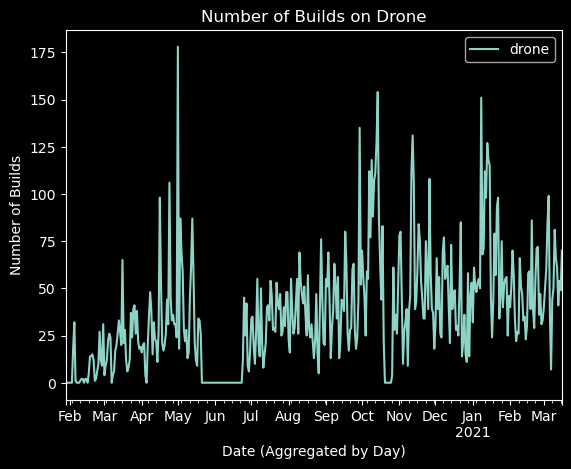

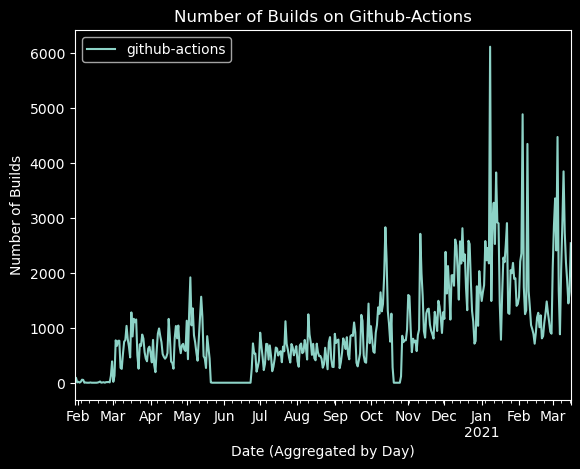

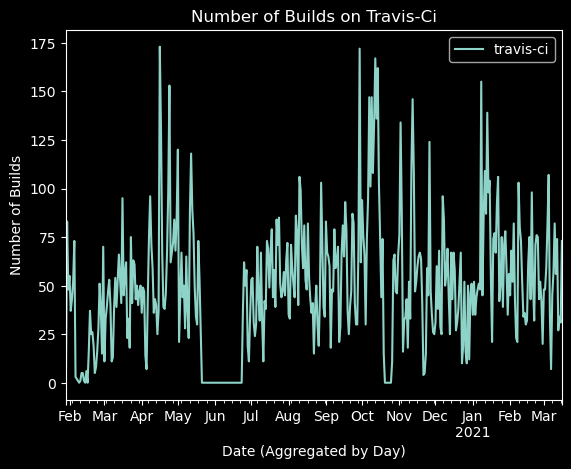

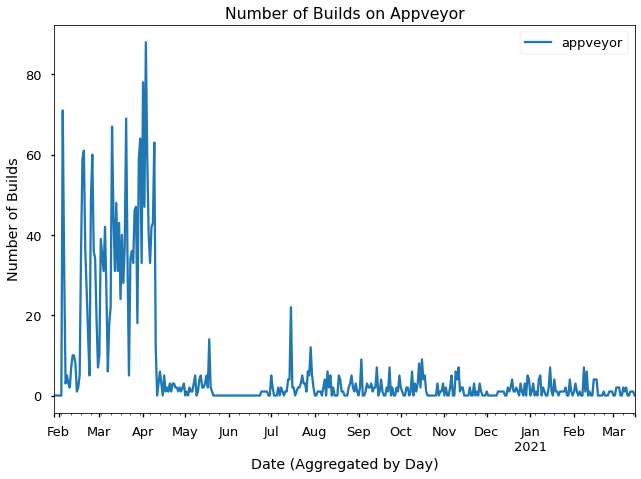

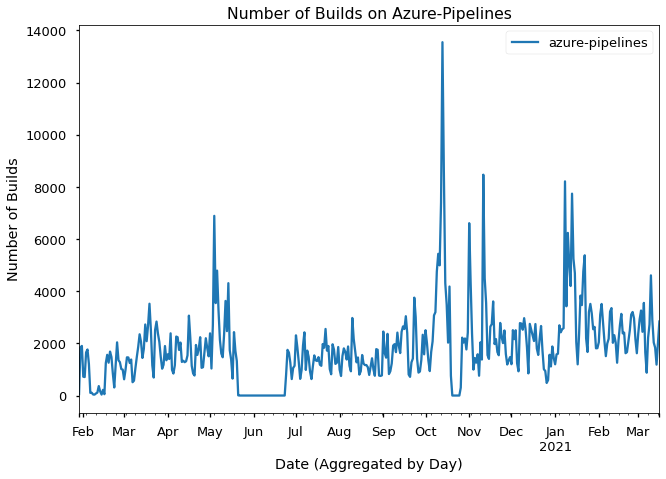

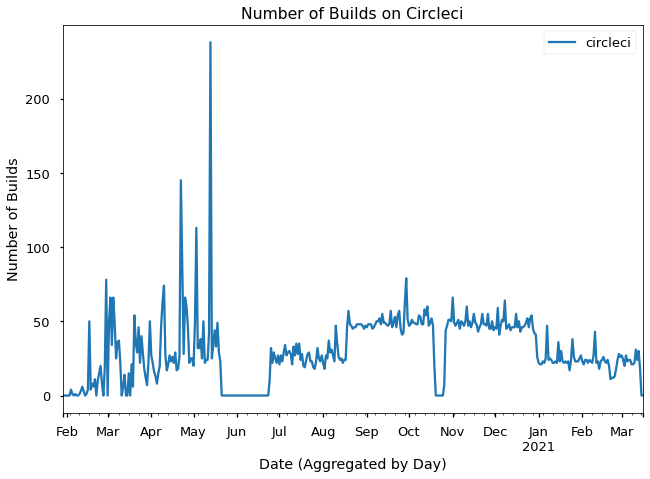

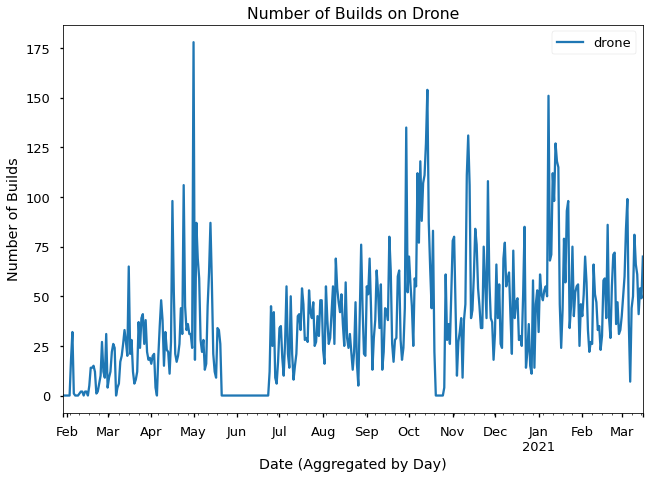

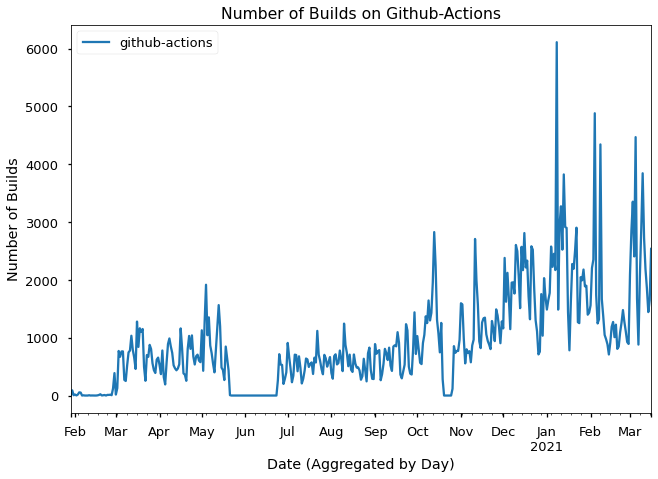

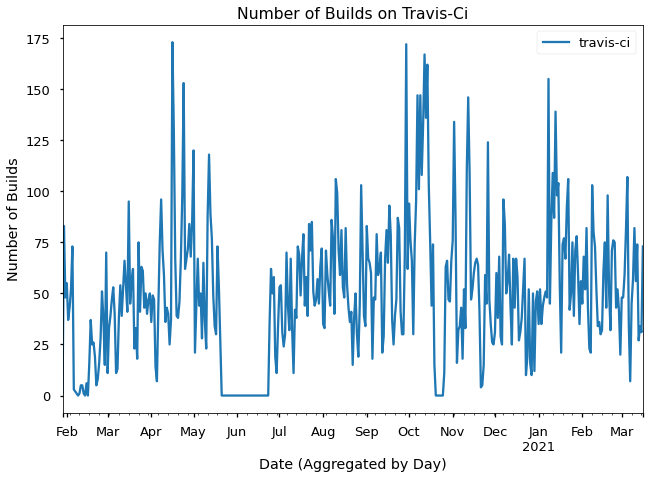

In [15]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        for k in df3.columns:
            fig, ax = plt.subplots()
            df3.plot(y=k, ax=ax)
            ax.set_title(f"Number of Builds on {k.title()}")
            ax.set_xlabel("Date (Aggregated by Day)")
            ax.set_ylabel("Number of Builds")
            fig.savefig(f"plots/builds_{k}-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)
    

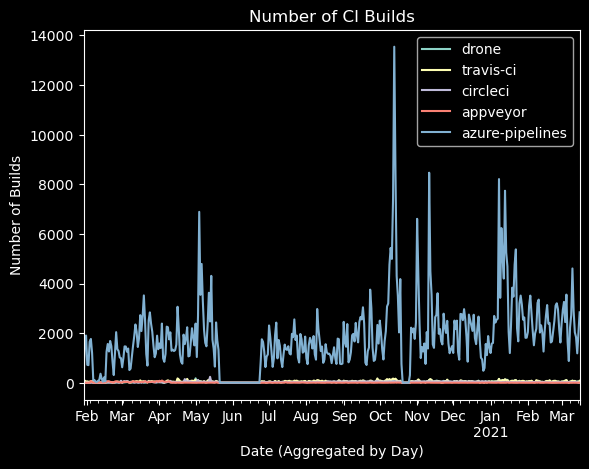

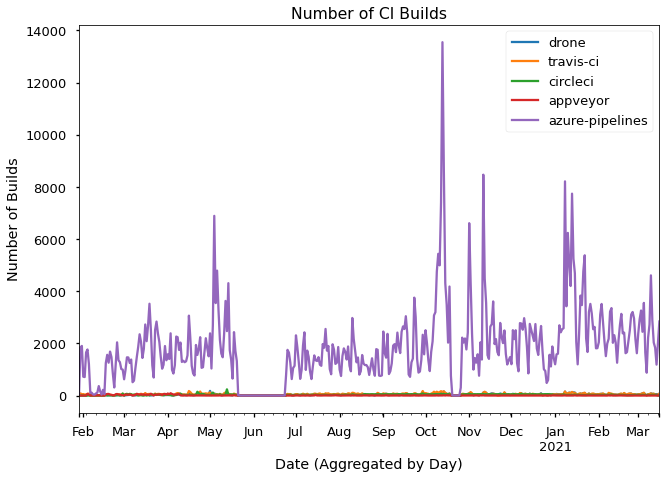

In [16]:
for context in [("dark_background", "seaborn-talk"), ("seaborn-talk", )]:
    with plt.style.context(*context):
        fig, ax = plt.subplots()
        df3.plot(y=list(set(df3.columns) - {'github-actions'}), ax=ax)
        ax.set_title(f"Number of CI Builds")
        ax.set_xlabel("Date (Aggregated by Day)")
        ax.set_ylabel("Number of Builds")
        fig.savefig(f"plots/builds_combined-{'_'.join(context)}.png", bbox_inches='tight', transparent=True)
    